# Decision trees
- Pruning
    - removing unwanted branches from the tree
- Branch/SubTree
    - formed by splitting the tree
- Parent/Child Node
    - parent -root node or starting node
    - child branches from parent
- Splitting
- Root Node
- Leaf Node
    - no further nodes after it is leaf node

### Entropy
- randomness in the data
- $$ s = P(yes)  \log_2 P(yes) - P(No) log_2 P(No)$$


[Example of it in practical use](https://experiments.withgoogle.com/ai/drum-machine/view/)

In [39]:
from sklearn import tree


clf = tree.DecisionTreeClassifier()                                            


#[height, hair-length, voice-pitch]                                            
X = [ [180, 15,0],                                                              
      [167, 42,1],                                                              
      [136, 35,1],                                                              
      [174, 15,0],                                                              
      [141, 28,1]
      ]                                                              


Y = ['man', 'woman', 'woman', 'man', 'woman']                                  


clf = clf.fit(X, Y)                                                            
prediction = clf.predict([[133, 12,0]])                                        
print(prediction)


['man']


Perform encoding

In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [45]:
file_path = 'content/dtdb.csv'

df = pd.read_csv(file_path)

df.head(1)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no


In [50]:
label_encoder = LabelEncoder()

df_encoded = df.copy()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
df_encoded.head(2)

,outlook,temp,humidity,windy,play
0,2,1,0,False,0
1,2,1,0,True,0


In [53]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder

import pandas as pd 
import numpy as np 

df = pd.read_csv('content/dtdb.csv') 

lb = LabelEncoder() 
df['outlook_'] = lb.fit_transform(df['outlook']) 
df['temp_'] = lb.fit_transform(df['temp'] ) 
df['humidity_'] = lb.fit_transform(df['humidity'] ) 
df['windy_'] = lb.fit_transform(df['windy'] )   
df['play_'] = lb.fit_transform(df['play'] ) 
X = df.iloc[:,5:9] 
Y = df.iloc[:,9]

X_train, X_test , y_train,y_test = train_test_split(X, Y, test_size = 0.4, random_state = 100) 

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train.astype(int),y_train.astype(int)) 
y_pred_en = clf_entropy.predict(X_test)

print("Accuracy is :{0}".format(accuracy_score(y_test.astype(int),y_pred_en) * 100))


prediction = clf_entropy.predict([[2, 2,0,1]])                                        
print(prediction)


Accuracy is :66.66666666666666
[0]


c:\Users\E1005290\OneDrive - Sanlam Life Insurance Limited\Documents\Machine Learning and AI\Machine-Learning-Notes\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


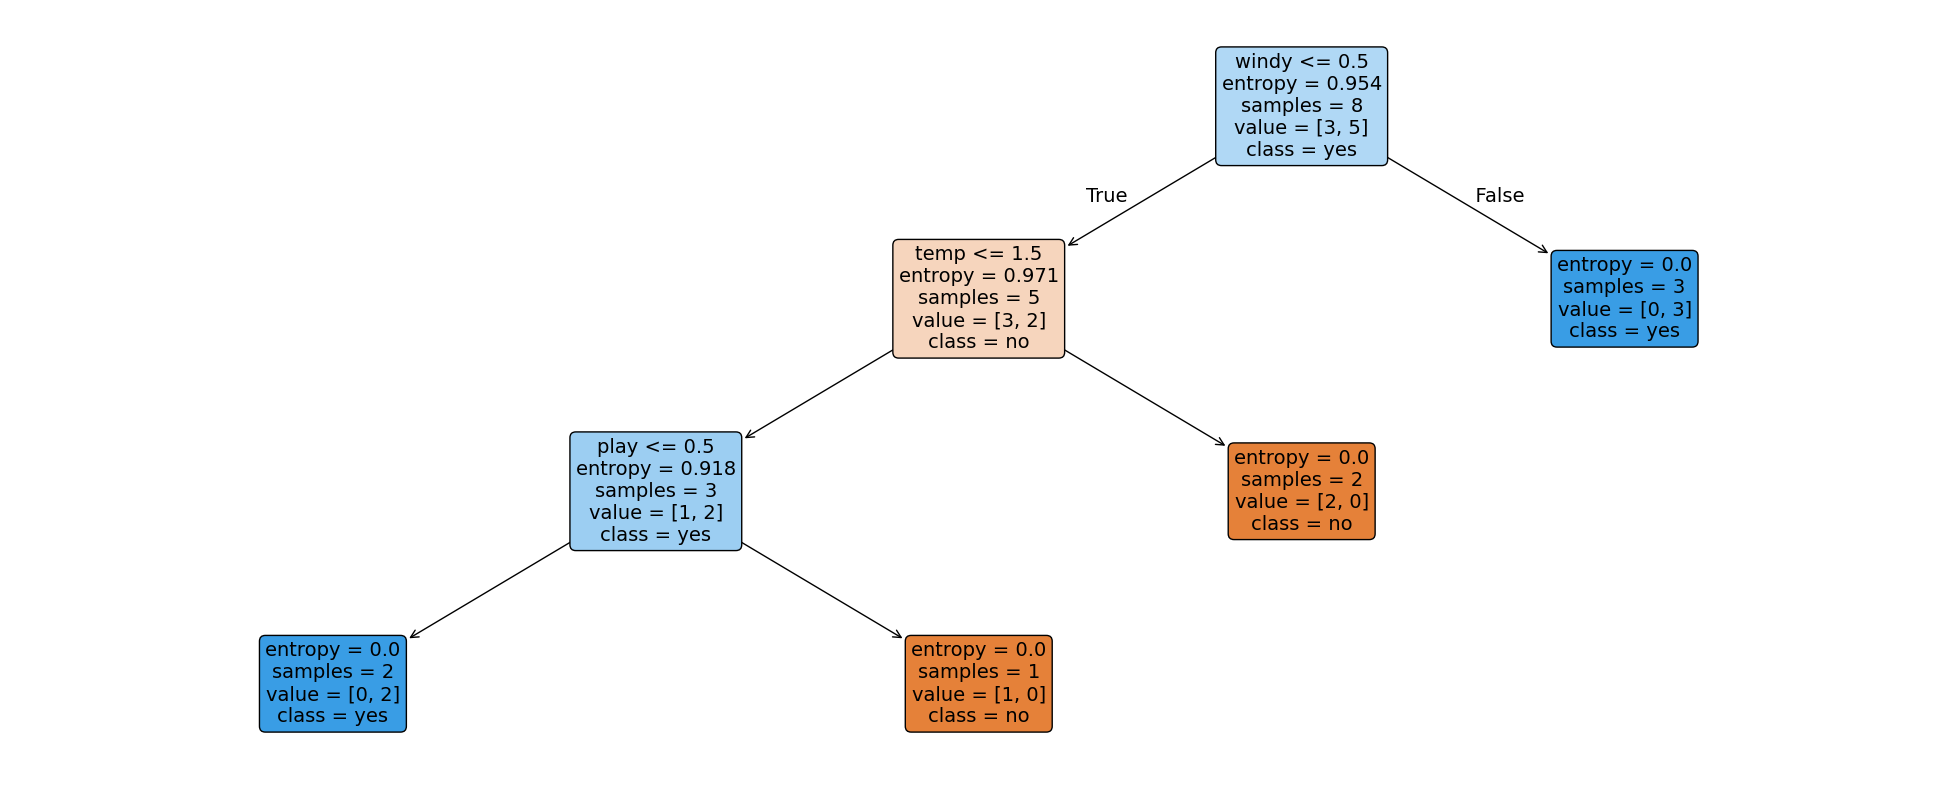

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('content/dtdb.csv')

lb = LabelEncoder()
df['outlook_'] = lb.fit_transform(df['outlook'])
df['temp_'] = lb.fit_transform(df['temp'])
df['humidity_'] = lb.fit_transform(df['humidity'])
df['windy_'] = lb.fit_transform(df['windy'])
df['play_'] = lb.fit_transform(df['play'])

X = df[['outlook_', 'temp_', 'humidity_', 'windy_']]
Y = df['play_']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)


clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

column_headings_list = df.columns.tolist()
feature_names = column_headings_list[1:5]  
class_names = lb.classes_ 

plt.figure(figsize=(25,10))
plot_tree(clf, 
          feature_names=feature_names, 
          class_names=class_names, 
          filled=True, 
          rounded=True, 
          fontsize=14)

plt.show()


Create a desktop application that opens the above

In [70]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import base64
from PIL import Image, ImageTk

# Load and preprocess data
df = pd.read_csv('content/dtdb.csv')

lb = LabelEncoder()
df['outlook_'] = lb.fit_transform(df['outlook'])
df['temp_'] = lb.fit_transform(df['temp'])
df['humidity_'] = lb.fit_transform(df['humidity'])
df['windy_'] = lb.fit_transform(df['windy'])
df['play_'] = lb.fit_transform(df['play'])
X = df[['outlook_', 'temp_', 'humidity_', 'windy_']]
Y = df['play_']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf_entropy.predict(X_test)) * 100

# Function to create tree image
def get_tree_image():
    fig, ax = plt.subplots(figsize=(12, 8))
    tree.plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=lb.classes_, ax=ax)
    plt.close(fig)
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    return img

# Tkinter GUI
class DecisionTreeApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Decision Tree Prediction")

        # Labels and Entry Widgets
        self.create_widgets()

    def create_widgets(self):
        ttk.Label(self.root, text="Outlook:").grid(row=0, column=0, padx=10, pady=5)
        self.outlook_var = tk.StringVar()
        ttk.Entry(self.root, textvariable=self.outlook_var).grid(row=0, column=1, padx=10, pady=5)

        ttk.Label(self.root, text="Temperature:").grid(row=1, column=0, padx=10, pady=5)
        self.temp_var = tk.StringVar()
        ttk.Entry(self.root, textvariable=self.temp_var).grid(row=1, column=1, padx=10, pady=5)

        ttk.Label(self.root, text="Humidity:").grid(row=2, column=0, padx=10, pady=5)
        self.humidity_var = tk.StringVar()
        ttk.Entry(self.root, textvariable=self.humidity_var).grid(row=2, column=1, padx=10, pady=5)

        ttk.Label(self.root, text="Windy:").grid(row=3, column=0, padx=10, pady=5)
        self.windy_var = tk.StringVar()
        ttk.Entry(self.root, textvariable=self.windy_var).grid(row=3, column=1, padx=10, pady=5)

        # Buttons
        ttk.Button(self.root, text="Predict", command=self.predict).grid(row=4, column=0, columnspan=2, pady=10)
        ttk.Button(self.root, text="Show Tree", command=self.show_tree).grid(row=5, column=0, columnspan=2, pady=10)

        # Labels for displaying results
        self.result_label = ttk.Label(self.root, text="Prediction: ")
        self.result_label.grid(row=6, column=0, columnspan=2, pady=10)

        self.accuracy_label = ttk.Label(self.root, text=f"Model Accuracy: {accuracy:.2f}%")
        self.accuracy_label.grid(row=7, column=0, columnspan=2, pady=10)

    def predict(self):
        try:
            input_data = {
                'outlook_': lb.transform([self.outlook_var.get()])[0],
                'temp_': lb.transform([self.temp_var.get()])[0],
                'humidity_': lb.transform([self.humidity_var.get()])[0],
                'windy_': lb.transform([self.windy_var.get()])[0]
            }
            input_df = pd.DataFrame([input_data])
            prediction = clf_entropy.predict(input_df)
            prediction_label = lb.inverse_transform(prediction)[0]
            self.result_label.config(text=f"Prediction: {prediction_label}")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {e}")

    def show_tree(self):
        img = get_tree_image()
        img.show()

# Run the application
if __name__ == "__main__":
    root = tk.Tk()
    app = DecisionTreeApp(root)
    root.mainloop()


![Decision tree](./images/decisionTree.PNG "Decision tree image notes")

Accuracy is : 66.67%


AttributeError: 'list' object has no attribute 'savefig'

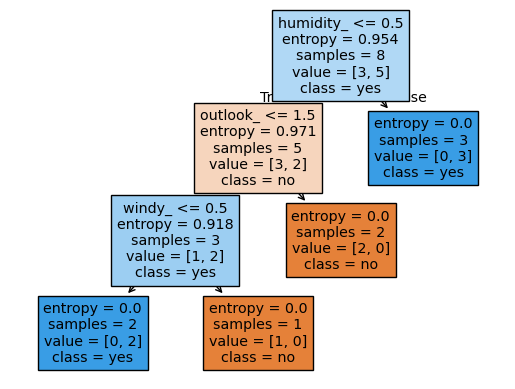

In [72]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.io as pio
import io
import base64

# Load and preprocess data
df = pd.read_csv('content/dtdb.csv')

lb = LabelEncoder() 
df['outlook_'] = lb.fit_transform(df['outlook']) 
df['temp_'] = lb.fit_transform(df['temp']) 
df['humidity_'] = lb.fit_transform(df['humidity']) 
df['windy_'] = lb.fit_transform(df['windy'])   
df['play_'] = lb.fit_transform(df['play']) 
X = df[['outlook_', 'temp_', 'humidity_', 'windy_']] 
Y = df['play_']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred_en) * 100
print(f"Accuracy is : {accuracy:.2f}%")

# Function to create Plotly tree plot
def plot_tree_as_html():
    fig = go.Figure()

    # Plot tree using Plotly
    plot_tree = tree.plot_tree(clf_entropy, feature_names=X.columns, class_names=lb.classes_, filled=True)
    # Save plot to a BytesIO object
    buf = io.BytesIO()
    plot_tree.savefig(buf, format='png')
    buf.seek(0)
    img_str = base64.b64encode(buf.getvalue()).decode('utf-8')
    buf.close()
    
    fig.add_layout_image(
        dict(
            source=f'data:image/png;base64,{img_str}',
            x=0,
            y=1,
            sizex=1,
            sizey=1,
            xanchor="left",
            yanchor="top"
        )
    )
    fig.update_layout(
        title_text="Decision Tree Visualization",
        xaxis_visible=False,
        yaxis_visible=False,
        margin=dict(l=0, r=0, t=30, b=0)
    )
    return pio.to_html(fig, full_html=False)

# Generate and print the Plotly tree HTML
html_str = plot_tree_as_html()
with open('decision_tree_plot.html', 'w') as f:
    f.write(html_str)

print("Decision tree plot saved as decision_tree_plot.html")


In [1]:
# %pip install pydotplus
# %pip install graphviz
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import pydotplus
from graphviz import Source
import plotly.graph_objects as go
import io
import base64

# Load and preprocess data
df = pd.read_csv('content/dtdb.csv')

lb = LabelEncoder()
df['outlook_'] = lb.fit_transform(df['outlook'])
df['temp_'] = lb.fit_transform(df['temp'])
df['humidity_'] = lb.fit_transform(df['humidity'])
df['windy_'] = lb.fit_transform(df['windy'])
df['play_'] = lb.fit_transform(df['play'])
X = df[['outlook_', 'temp_', 'humidity_', 'windy_']]
Y = df['play_']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred_en) * 100
print(f"Accuracy is : {accuracy:.2f}%")

# Function to create Plotly tree plot
def plot_tree_as_html():
    # Create DOT data
    dot_data = tree.export_graphviz(clf_entropy, 
                                    out_file=None, 
                                    feature_names=X.columns,  
                                    class_names=lb.classes_,  
                                    filled=True,  
                                    rounded=True,  
                                    special_characters=True)
    
    # Create a graph from DOT data
    graph = pydotplus.graph_from_dot_data(dot_data)
    
    # Convert to PNG
    img_str = base64.b64encode(graph.create_png()).decode('utf-8')
    
    # Create Plotly figure
    fig = go.Figure()
    fig.add_layout_image(
        dict(
            source=f'data:image/png;base64,{img_str}',
            x=0,
            y=1,
            sizex=1,
            sizey=1,
            xanchor="left",
            yanchor="top"
        )
    )
    fig.update_layout(
        title_text="Decision Tree Visualization",
        xaxis_visible=False,
        yaxis_visible=False,
        margin=dict(l=0, r=0, t=30, b=0)
    )
    return fig

# Generate and display Plotly tree HTML
fig = plot_tree_as_html()
fig.write_html('decision_tree_plot.html')

print("Decision tree plot saved as decision_tree_plot.html")


# Random forest

In [5]:
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)

print(iris.target)


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head(10)


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [20]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=5) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

y_pred_en = clf_entropy.predict(X_test)



y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred_en) * 100
print(f"Decision tree Accuracy is : {accuracy:.2f}%")


Accuracy: 0.9333333333333333
Decision tree Accuracy is : 93.33%


Comparing decision tree vs Random Forest

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
import pandas as pd 

df = pd.read_csv('content/dtdb.csv') 

lb = LabelEncoder() 
df['outlook_'] = lb.fit_transform(df['outlook']) 
df['temp_'] = lb.fit_transform(df['temp'] ) 
df['humidity_'] = lb.fit_transform(df['humidity'] ) 
df['windy_'] = lb.fit_transform(df['windy'] )   
df['play_'] = lb.fit_transform(df['play'] ) 
X = df.iloc[:,5:9] 
Y = df.iloc[:,9]

X_train, X_test , y_train,y_test = train_test_split(X, Y, test_size = 0.4, random_state = 100) 

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train.astype(int),y_train.astype(int)) 
y_pred_en = clf_entropy.predict(X_test)

clf=RandomForestClassifier(n_estimators=1000)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Decision Tree Accuracy is :{0}".format(accuracy_score(y_test.astype(int),y_pred_en) * 100))
print("Random Forest Accuracy is :{0}".format(accuracy_score(y_test.astype(int),y_pred) * 100))



Decision Tree Accuracy is :66.66666666666666
Random Forest Accuracy is :83.33333333333334


In [21]:
import plotly.graph_objects as go

# Calculate feature importances
importances = clf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig.update_layout(
    title='Feature Importances in Random Forest Model',
    xaxis_title='Features',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

# Save the plot as an HTML file
fig.write_html('feature_importances_plot.html')

print("Feature importances plot saved as feature_importances_plot.html")


Feature importances plot saved as feature_importances_plot.html


Accuracy is :66.66666666666666
Accuracy is :83.33333333333334


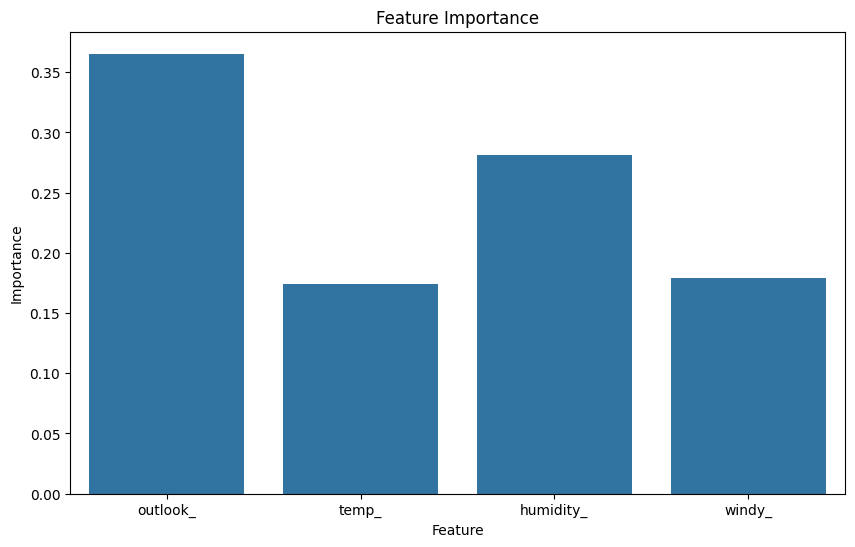

In [32]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder

import pandas as pd 
import numpy as np 

df = pd.read_csv('content/dtdb.csv') 

lb = LabelEncoder() 
df['outlook_'] = lb.fit_transform(df['outlook']) 
df['temp_'] = lb.fit_transform(df['temp'] ) 
df['humidity_'] = lb.fit_transform(df['humidity'] ) 
df['windy_'] = lb.fit_transform(df['windy'] )   
df['play_'] = lb.fit_transform(df['play'] ) 
X = df.iloc[:,5:9] 
Y = df.iloc[:,9]

X_train, X_test , y_train,y_test = train_test_split(X, Y, test_size = 0.4, random_state = 100) 

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train.astype(int),y_train.astype(int)) 
y_pred_en = clf_entropy.predict(X_test)

print("Accuracy is :{0}".format(accuracy_score(y_test.astype(int),y_pred_en) * 100))
################################################################
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf_entropy=RandomForestClassifier(n_estimators=1000)
clf_entropy.fit(X_train.astype(int),y_train.astype(int)) 
y_pred_en = clf_entropy.predict(X_test)

print("Accuracy is :{0}".format(accuracy_score(y_test.astype(int),y_pred_en) * 100))



import seaborn as sns
import matplotlib.pyplot as plt
importance = clf_entropy.feature_importances_
# Use 'columns' attribute to get feature names if using older pandas version
feature_name = df.columns[5:9]  
plt.figure(figsize=(10,6))
sns.barplot(x=feature_name, y=importance)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

[Chrome music use cases ](https://musiclab.chromeexperiments.com/Song-Maker/)

# Support Vector Machine (SVM)
- Supervised using hyperplanes
    - Classification and regression 
    - SVM kernel
    - Supervised Machine

    
Contains:
- Margin
- hyperplane 
- supporting vector

Accuracy of SVM: 0.82


C:\Users\E1005290\AppData\Local\Temp\ipykernel_12096\3992400923.py:55: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



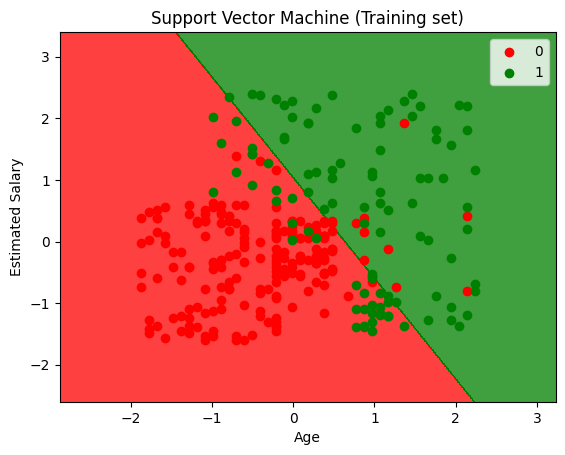

C:\Users\E1005290\AppData\Local\Temp\ipykernel_12096\3992400923.py:73: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



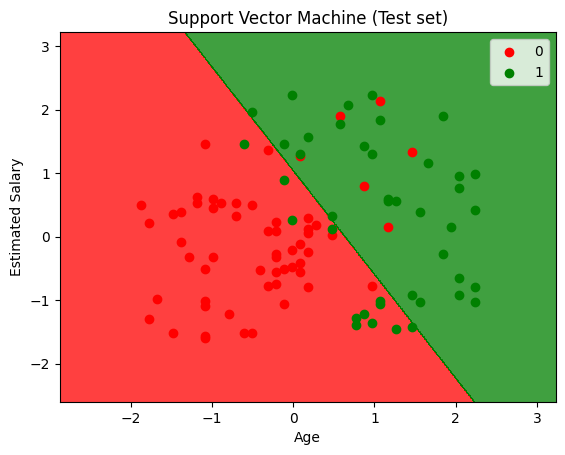

Accuracy of RF: 0.89


In [35]:
# Support Vector Machine
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

# Importing the datasets

datasets = pd.read_csv('content/Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

# Feature Scaling
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Fitting the classifier into the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix 

cm = confusion_matrix(Y_Test, Y_Pred)
print("Accuracy of SVM:",metrics.accuracy_score(Y_Test, Y_Pred))

# Visualising the Training set results

X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_Train,Y_Train)

y_pred=clf.predict(X_Test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of RF:",metrics.accuracy_score(Y_Test, y_pred))


In [38]:
# Support Vector Machine
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Importing the datasets

datasets = pd.read_csv('content/Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 1)



classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)
Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix 
# cm = confusion_matrix(Y_Test, Y_Pred)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_Train,Y_Train)

y_pred=clf.predict(X_Test)


# Feature Scaling
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)
Y_Pred_scl = classifier.predict(X_Test)


clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_Train,Y_Train)

y_pred_scl=clf.predict(X_Test)

print("Accuracy of SVM:",metrics.accuracy_score(Y_Test, Y_Pred))
print("Accuracy of SVM with scaling:",metrics.accuracy_score(Y_Test, Y_Pred_scl))
print("Accuracy of RF:",metrics.accuracy_score(Y_Test, y_pred))
print("Accuracy of RF with scaling:",metrics.accuracy_score(Y_Test, y_pred_scl))

Accuracy of SVM: 0.81
Accuracy of SVM with scaling: 0.82
Accuracy of RF: 0.87
Accuracy of RF with scaling: 0.89


# Principle Component Analysis (PCA)  
- Remove unwanted variable without loosing the important variable

In [39]:
import numpy as np  
import pandas as pd  
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']  
dataset = pd.read_csv(url, names=names)  
X = dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']] 
y = dataset['Class'] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

##################################################

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

###############################################

from sklearn.decomposition import PCA
pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  
explained_variance = pca.explained_variance_ratio_  
print(explained_variance)



[0.72226528 0.23974795 0.03338117 0.0046056 ]


## 1 principal component to train our algorithm

In [40]:
import numpy as np  
import pandas as pd  
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']  
dataset = pd.read_csv(url, names=names)  
X = dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']] 
y = dataset['Class'] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

##################################################

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

# Training and Predictions

# In this case we'll use random forest classification for making the predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test) 
y_pred

# Performance Evaluation 

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy',accuracy_score(y_test, y_pred)) 


[[11  0  0]
 [ 0  8  5]
 [ 0  1  5]]
Accuracy 0.8


# Time Series Analysis  
- Secular trend - the increase or decrease in movements of time series
- Seasonal variation - short term fluctuation which occur periodically in a year.
- Cyclical Variations - repeated upward or downward movements but the period is greater than a year. They are not regular
- Irregular variations - short in duration, erratic in nature and follow no regularity in the occurrence variations
- Time Series Model
    - Addition - Y= T +S + C + I
    - Y = original data
    - T - Trend value
    - Multiplication - Y =TSCI
- Least square 